# NFL - Does winning in the first quarter really matter in the NFL?
### Motto: Start strong. Establish small victories. Win each quarter.

![theatlantic](https://cdn.theatlantic.com/assets/media/video/img/upload/2012/01/screen-shot-2012-01-31-at-14643-pm/video-featured.png?1431550038 "Bill Maher — Irritable Bowl Syndrome; Directed and Animated by Fraser Davidson")

##### Set the tone. Get ahead early. Win each quarter.
One would assume that [Al Pacino in Any Given Sunday](https://www.youtube.com/watch?v=f1yWSePMqsk) methodology in football is correct which is: football is won inch by inch. But does certain inches matter? In this case we are referring to the four or five quarters in the NFL game. If a team wins each quarter obviously they win the game. Makes sense, however, does winning in the first quarter correlated to a win by the end of the game? Or is it that if a team plays too hard out of the gates, it leads to overdoing it early leaving limited ferocity in the final inches where it really matters? Can teams really afford to wait that long to give it their all? Or does winning early actually set the tone for winning the entire game? Luckily there is data readily available to feed our eager minds!

### Overview
In this post we will walk through solving a complete machine learning problem using the NFL dataset. Our objective is as follows:
Use the provided NFL data to develop a model to assess and predict the correlation between teams winning in the first quarter and winning games over the course of the season.

To get started, first lets review the basic approach for developing this solutions. This is a supervised regression machine learning task. Which means we have been given a set of data with target (in this case score differences for each quarter) included and we want to train a model that can learn to map the features to the target.

We will be using the NFL dataset from [nflscrapR-data](https://github.com/ryurko/nflscrapR-data), which our core dataset is the [nfl_season_pbp_dataset](https://github.com/ryurko/nflscrapR-data/tree/master/data/season_play_by_play). __Note:__ only regular season data is used in our evaluation.

__Point to remember:__ One law of data science to keep top of mind: correlation does not imply causation. This is a common statistical phases used to emphasize that a correlation between two variables does not imply that one causes the other.
With that said, lets get started! Here is the link to my github notebook for additional details & explanations.


## Data Imports and Data Analysis
### Importing the Libraries

In [1]:
import pandas as pd  # data manipultion librabry
import numpy as np # numerical computation library

# Display up to 120 columns of a dataframe
pd.set_option('display.max_columns', 120)

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.model_selection import cross_val_score


### Getting Data
Note this data can be collected from [nflscrapR-dataset's nfl_season_pbp_dataset](https://github.com/ryurko/nflscrapR-data/tree/master/data/season_play_by_play) or can be downloaded directly from my [GitHub repo](https://github.com/naivelogic/NFL-smarter-football/blob/master/nfl_team_stats.csv). 

In [2]:
nfl_df = pd.read_csv('nfl_season_pbp.csv')
nfl_df.shape
nfl_df.tail()

/home/redne/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (26,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,GameID,play_id,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
407683,2012-12-30,2012123007,3637,22,4,NaN,01:09,2,69.0,0.0,WAS,35.0,35.0,0,0,0.0,NaN,DAL,WAS,K.Forbath kicks 59 yards from WAS 35 to DAL 6....,1,20,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,D.Harris,NaN,C.Wilson,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.702720,0.048047,0.003351,0.034880,0.111059,0.000459,0.099483,0.0,0.0,0.635472,0.192438,NaN,NaN,0.984384,0.015616,0.985743,0.014257,0.015616,-0.001359,NaN,NaN,2012
407684,2012-12-30,2012123007,3659,22,4,1.0,01:02,2,62.0,7.0,DAL,26.0,74.0,10,4,0.0,0.0,DAL,WAS,(1:02) (Shotgun) T.Romo pass short middle to F...,1,4,0,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Romo,00-0021678,1,Complete,Short,1,3,0,middle,0,NaN,NaN,None,0,NaN,NaN,F.Jones,00-0026162,1,NaN,NaN,NaN,J.Wilson,S.Bowen,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.676691,0.044547,0.002162,0.032302,0.128912,0.000490,0.114896,0.0,0.0,0.827910,-0.054144,-0.172892,0.118748,0.985743,0.014257,0.988452,0.011548,0.014257,-0.002710,-0.002032,-0.000678,2012
407685,2012-12-30,2012123007,3687,22,4,2.0,00:40,1,40.0,22.0,DAL,30.0,70.0,6,9,0.0,0.0,DAL,WAS,"(:40) (No Huddle, Shotgun) T.Romo pass short r...",1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Romo,00-0021678,1,Complete,Short,2,3,0,right,0,NaN,NaN,None,0,NaN,NaN,J.Hanna,00-0029634,1,NaN,NaN,NaN,J.Wilson,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.689524,0.044315,0.001826,0.031873,0.122792,0.000518,0.109152,0.0,0.0,0.773766,0.176164,-0.124669,0.300833,0.988452,0.011548,0.932941,0.067059,0.011548,0.055511,0.002206,0.053305,2012
407686,2012-12-30,2012123007,3711,22,4,3.0,00:15,1,15.0,25.0,DAL,35.0,65.0,1,16,0.0,0.0,DAL,WAS,"(:15) (No Huddle, Shotgun) T.Romo pass short m...",1,7,0,0,NaN,NaN,NaN,0,0,NaN,Pass,T.Romo,00-0021678,1,Complete,Short,5,2,0,middle,0,NaN,NaN,None,0,NaN,NaN,J.Hanna,00-0029634,1,NaN,NaN,NaN,P.Riley,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,18.0,28.0,-10.0,10.0,WAS,DAL,0,None,0,0,0,0,0,0.686712,0.040447,0.001428,0.028126,0.107493,0.000404,0.135389,0.0,0.0,0.949931,0.000000,0.270577,-0.270577,0.932941,0.067059,1.000000,0.000000,0.067059,-0.067059,-0.065616,-0.001442,2012
407687,2012-12-30,2012123007,3735,22,4,NaN,00:00,0,0.0,15.0,DAL,35.0,35.0,0,16,0.0,0.0,DAL,WAS,END GAME,1,0,0,0,NaN,NaN,NaN,0,0,NaN,End of Game,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,-10.0,NaN,WAS,DAL,0,None,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000004,0.000000,NaN,NaN,2012


The NFL play by play datset consists of 407,688 data points with 103 features. We have a lot to play with lets dig in!

### Coorelate for all games by quarter

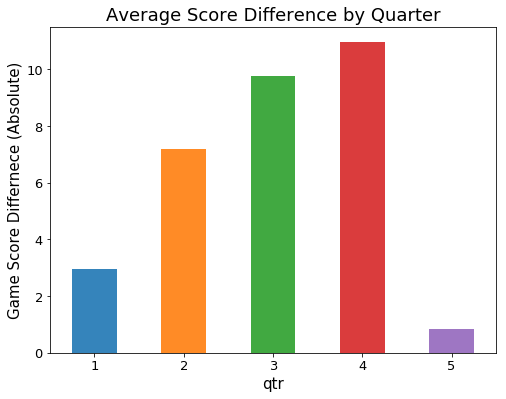

In [3]:
fig, ax = plt.subplots(figsize=(8,6), dpi = 72)

ax.set_title("Average Score Difference by Quarter", fontsize = 18)
ax.set_xlabel('Quarters', fontsize = 15)
ax.set_ylabel('Game Score Differnece (Absolute)', fontsize=15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

nfl_df.groupby(by=['qtr']).AbsScoreDiff.mean().plot(kind='bar', alpha = 0.9, rot=0)
plt.show()

Here we can see there is a significant distribution between the score difference from the first quarter to the fourth quarter. However, and interesting insight would be to see the distribution of wins and losses.


### Data Processing
Next we add game win indicators. In the dataset there are columns that show the score for each play, however, because this is individual play by play data, there is no overall Wins / Losses column. So therefore, we will simply take a subset of the data by `season`, `GameID` column indicated the unique games and for each home and away team we will create a new `win_loss_df` to indicate which team won or loss their game overall and then merge that new column so we can track at the quarter level.

In [4]:
def lastplay(df):
    # last row of data frame based on groupby filter
    if np.isnan(df.iloc[-1].Home_WP_pre) == False:
        return df.iloc[-1] 
    
    # last row of data frame second to last row if NA on last
    elif np.isnan(df.iloc[-2].Home_WP_pre) == False:
        return df.iloc[-2] 

In [8]:
win_loss_df = nfl_df.groupby('GameID').apply(lastplay).groupby(by=['Season','GameID','HomeTeam','AwayTeam']).agg({'Home_WP_pre':lambda x: int(round(x)),
                                                                    'Away_WP_pre':lambda x: int(round(x))}).reset_index()


win_loss_df = win_loss_df[['GameID','HomeTeam','AwayTeam','Home_WP_pre', 'Away_WP_pre']].rename(columns={'Home_WP_pre':'home_win',
                                                                       'Away_WP_pre':'away_win'})


win_loss_df.head()

/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'GameID' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,GameID,HomeTeam,AwayTeam,home_win,away_win
0,2.009091e+09,PIT,TEN,1.0,0.0
1,2.009091e+09,ATL,MIA,1.0,0.0
2,2.009091e+09,BAL,KC,1.0,0.0
3,2.009091e+09,CAR,PHI,0.0,1.0
4,2.009091e+09,CIN,DEN,0.0,1.0


Next we will merge the win_loss data frame into `NFL` and use lambda logic to set a Win or Loss for each team on offesne (posteam). We will also specify the two turnover columns (`InterceptionThrown `, `Fumble`) we want to consolidate as a sum of total turnovers for each play. 

In [9]:
nfl_df = nfl_df.merge(win_loss_df, on=['GameID','HomeTeam','AwayTeam'], how='left')

# Create a Team_Win column to indicate a win loss
nfl_df['team_win'] = nfl_df.apply(lambda x: x.home_win if x.HomeTeam == x.posteam else x.away_win, axis=1)

# Create a column for total turnovers for potential features
tunrover_list = ['InterceptionThrown', 'Fumble']
nfl_df['Turnover'] = nfl_df[tunrover_list].sum(axis=1)

Now that we have the wins and losses, we select a hand full of columns (soon to be referred to as features) that have the most impact on assess the correlation between early score differentiation and winning the game / season. To do this we will utilize the groupby function.

In [10]:
nfl = nfl_df.groupby(by=['Season','GameID','qtr',
                         'HomeTeam','AwayTeam','posteam']).agg({'team_win':'mean',
                                                                
                                                               'Win_Prob':'mean',
                                                               'Yards.Gained':'sum',
                                                               'Penalty.Yards':'sum',
                                                               'Touchdown':'sum',
                                                               'Turnover':'sum',
                                                               'FirstDown':'count',
                                                               'EPA':'mean',
                                                               'FirstDown':'sum',
    }).reset_index().rename(columns={'Yards.Gained':'Total_Yards',
                                    'Penalty.Yards':'Penalty_Yards'})
nfl.tail(3)

,Season,GameID,qtr,HomeTeam,AwayTeam,posteam,team_win,Win_Prob,Total_Yards,Penalty_Yards,Touchdown,Turnover,FirstDown,EPA
18684,2017,2017123115,3,SEA,ARI,SEA,0.0,0.216790,192,35,1,1,8.0,0.033649
18685,2017,2017123115,4,SEA,ARI,ARI,1.0,0.613416,65,30,0,1,6.0,-0.128126
18686,2017,2017123115,4,SEA,ARI,SEA,0.0,0.444802,141,0,1,0,5.0,0.176001


### Create Box Score

Next we will be creating a box score that indicates the game scores as well as inividual game achievements . When reviewing the inital dataset, we are provided the scores for each play and the accumulation of those scores.  In order to appropropriately understand the distribution of teams that won each quarter (qt) and the effect that quarter has on the game and the season, we first must a column for to total the score for each quarter and binary inidcate what is team won that quarter. 

To start off we first create a function to get each score at the end of the quarter. The function below is called by a a data frame that is subset by quarter and by team taking the last score from the offensive (Possession team) and the defensive team.

In [11]:
def scores_per_qt(df):
    if np.isnan(df.iloc[-1].DefTeamScore) == False:
        return df.iloc[-1] # last row of data frame
    elif np.isnan(df.iloc[-2].DefTeamScore) == False:
        return df.iloc[-2] # last row of data frame

Creat an offensive score table use to calcuate the total scores for each team per quarter. 

In [12]:
offensive_score_df = nfl_df.groupby(['GameID','qtr','posteam']).apply(scores_per_qt).groupby(by=['Season','GameID','qtr','posteam']).agg({'PosTeamScore':'mean',
                                                                    'DefTeamScore':'mean'}).reset_index()
#offensive_score_df

/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'GameID' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'qtr' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'posteam' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Create table for the Defenseive Score and Offenstive scores in terms of the defenseive team. We are doing this because, there are cases in the data set where the Possession team ended the quarter with a defensive score which would not be included in the offensive score table above. 

In [13]:
defensive_score_df = nfl_df.groupby(['GameID','qtr','DefensiveTeam','posteam']).apply(scores_per_qt)[['DefTeamScore','PosTeamScore']].reset_index().rename(columns={'DefensiveTeam':'posteam','posteam':'PosDefTeam'})
#defensive_score_df

merge the offensive score table and defensive score table, then create a column to show the max score for each team both on offense and defense to accuractly caputre end of quarter scores. 

In [14]:
score_df = offensive_score_df.merge(defensive_score_df, on=['GameID','qtr','posteam'], how='left')
score_df['PosTeamScore']=score_df[['PosTeamScore_x', 'DefTeamScore_y']].max(axis=1)
score_df['DefTeamScore']=score_df[['DefTeamScore_x', 'PosTeamScore_y']].max(axis=1)
score_df = score_df[['Season','GameID','qtr','posteam','PosTeamScore','DefTeamScore']]
#score_df

Create features for the `score_df` to indicate the score for each quarter and the difference in score for each quarter. 

In [15]:
score_df['qt_score_diff'] = score_df.PosTeamScore - score_df.DefTeamScore
score_df['qt_score_cumdiff'] = score_df.groupby(['posteam'])['PosTeamScore'].apply(lambda x: x.diff()) 
score_df['Pos_qt_score'] = np.where(score_df.qtr == 1, score_df.PosTeamScore, score_df.qt_score_cumdiff)
score_df = score_df.drop(['qt_score_cumdiff'], axis=1)
#score_df

Transpose `score_df` and indicate the difference in score for the game per possession team and then merge back with score_df. 

In [16]:
# create df2 to indicate the ScoreDiff
df2 = pd.pivot_table(score_df, index = ['GameID','posteam'], columns = ['qtr'], values = 'qt_score_diff').reset_index()
df2 = df2.rename(columns= {1:'ScoreDiff1', 2:'ScoreDiff2', 3:'ScoreDiff3', 4:'ScoreDiff4', 5:'ScoreDiff5'})
score_df = score_df.merge(df2, on=['GameID','posteam'], how='left')

## Feature Engineering & Selection
This is one of the most important parts of machine learning. Feature selection implies some degree of cardinality reduction, to impose a cutoff on the number of attributes that can be considered when building a model. In addition to the features included in the new data frame created above, we utilize additional features to describe the offensive productivity as well as the overall progress of the game.

Below we add features to indicate third and fourth down conversion rate. These down efficiency measure how often the team is able to convert a third or fourth down into a first down or a score. It is calculated by dividing the total number of 3rd/4th downs converted to first downs or scoring plays, and dividing it by the total number of 3rd/4th downs.

__Quarter Winners, Losers, Ties:__
Now we need to convert each ScoreDiffx feature to a category. For each row, we will indicate whether the ScoreDiff variable is a Win: 1, Loss: 0, or Tie: 0.5. 

In [17]:
score_df.loc[score_df['qt_score_diff'] > 0, 'qt_wlt'] = 1
score_df.loc[score_df['qt_score_diff'] < 0, 'qt_wlt'] = 0

In [18]:
score_df.loc[score_df['ScoreDiff1'] > 0, 'qt1_won'] = 1
score_df.loc[score_df['ScoreDiff1'] == 0, 'qt1_won'] = 0.5
score_df.loc[score_df['ScoreDiff1'] < 0, 'qt1_won'] = 0
score_df['qt1_won'] = score_df['qt1_won'].astype(int)

score_df.loc[score_df['ScoreDiff2'] > 0, 'qt2_won'] = 1
score_df.loc[score_df['ScoreDiff2'] == 0, 'qt2_won'] = 0.5
score_df.loc[score_df['ScoreDiff2'] < 0, 'qt2_won'] = 0
score_df['qt2_won'] = score_df['qt2_won'].astype(int)

score_df.loc[score_df['ScoreDiff3'] > 0, 'qt3_won'] = 1
score_df.loc[score_df['ScoreDiff3'] == 0, 'qt3_won'] = 0.5
score_df.loc[score_df['ScoreDiff3'] < 0, 'qt3_won'] = 0
score_df['qt3_won'] = score_df['qt3_won'].astype(int)

score_df.loc[score_df['ScoreDiff4'] > 0, 'qt4_won'] = 1
score_df.loc[score_df['ScoreDiff4'] == 0, 'qt4_won'] = 0.5
score_df.loc[score_df['ScoreDiff4'] < 0, 'qt4_won'] = 0
score_df['qt4_won'] = score_df['qt4_won'].astype(int)

score_df.loc[score_df['ScoreDiff5'] > 0, 'qt5_won'] = 1
score_df.loc[score_df['ScoreDiff5'] == 0, 'qt5_won'] = 0.5
score_df.loc[score_df['ScoreDiff5'] < 0, 'qt5_won'] = 0

Merge `nfl` datafrane with score_df

In [19]:
nfl = nfl.merge(score_df, on=['Season','GameID','posteam','qtr'], how='left')
nfl.head()

,Season,GameID,qtr,HomeTeam,AwayTeam,posteam,team_win,Win_Prob,Total_Yards,Penalty_Yards,Touchdown,Turnover,FirstDown,EPA,PosTeamScore,DefTeamScore,qt_score_diff,Pos_qt_score,ScoreDiff1,ScoreDiff2,ScoreDiff3,ScoreDiff4,ScoreDiff5,qt_wlt,qt1_won,qt2_won,qt3_won,qt4_won,qt5_won
0,2009,2009091000,1,PIT,TEN,PIT,1.0,0.524745,40,0,0,1,5.0,-0.454108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0.5
1,2009,2009091000,1,PIT,TEN,TEN,0.0,0.532470,128,20,0,1,8.0,-0.270560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,NaN
2,2009,2009091000,2,PIT,TEN,PIT,1.0,0.525211,172,25,1,1,4.0,0.258050,7.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0.5
3,2009,2009091000,2,PIT,TEN,TEN,0.0,0.514109,134,15,1,0,6.0,0.115124,7.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,NaN,NaN,0,0,0,0,NaN
4,2009,2009091000,3,PIT,TEN,PIT,1.0,0.539772,28,0,0,1,3.0,-0.397421,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0.5


Add Features for Thrid and Fouth down

In [20]:
test = nfl_df[(nfl_df.down == 4.0) & (nfl_df.PlayType != 'Punt') & (nfl_df.PlayType != 'No Play')& (nfl_df.PlayType != 'Field Goal')].groupby(['GameID','qtr','posteam']).agg({'down':'count',
                                                                          'FirstDown':'sum',
                                                                          'Touchdown':'sum'}).reset_index()

test['fourth_down_conv_rate']= (test['FirstDown']+test['Touchdown'])/test['down']

test = test.drop(['down','FirstDown','Touchdown'], axis=1)
nfl = nfl.merge(test, on=['GameID','qtr','posteam'], how='left')

In [21]:
test = nfl_df[(nfl_df.down == 3.0) & (nfl_df.PlayType != 'Punt') & (nfl_df.PlayType != 'No Play')& (nfl_df.PlayType != 'Field Goal')].groupby(['GameID','qtr','posteam']).agg({'down':'count',
                                                                          'FirstDown':'sum',
                                                                          'Touchdown':'sum'}).reset_index()

test['third_down_conv_rate']= (test['FirstDown']+test['Touchdown'])/test['down']

test = test.drop(['down','FirstDown','Touchdown'], axis=1)
nfl = nfl.merge(test, on=['GameID','qtr','posteam'], how='left')

Use lambda logic to have a win loss str variable for each team and Create feature variable to determine if team is home (1) or away (0)

In [22]:
# team win or loss string
nfl['team_win_str'] = nfl.apply(lambda x: 'Win' if x.team_win == 1.0 else 'Loss', axis=1)

# Indicate if team is home (1) or away (0)
nfl.loc[nfl['posteam'] == nfl['HomeTeam'], 'home_away'] = 1
nfl.loc[nfl['posteam'] == nfl['AwayTeam'], 'home_away'] = 0
nfl['home_away'] = nfl['home_away'].astype(int)

In [23]:
nfl.tail()

,Season,GameID,qtr,HomeTeam,AwayTeam,posteam,team_win,Win_Prob,Total_Yards,Penalty_Yards,Touchdown,Turnover,FirstDown,EPA,PosTeamScore,DefTeamScore,qt_score_diff,Pos_qt_score,ScoreDiff1,ScoreDiff2,ScoreDiff3,ScoreDiff4,ScoreDiff5,qt_wlt,qt1_won,qt2_won,qt3_won,qt4_won,qt5_won,fourth_down_conv_rate,third_down_conv_rate,team_win_str,home_away
18682,2017,2017123115,2,SEA,ARI,SEA,0.0,0.180523,63,20,0,2,5.0,-0.223045,7.0,20.0,-13.0,0.0,-3.0,-13.0,-9.0,-2.0,NaN,0.0,0,0,0,0,NaN,NaN,0.00,Loss,1
18683,2017,2017123115,3,SEA,ARI,ARI,1.0,0.764196,60,10,0,1,4.0,-0.283642,23.0,14.0,9.0,3.0,3.0,13.0,9.0,2.0,NaN,1.0,1,1,1,1,NaN,NaN,0.00,Win,0
18684,2017,2017123115,3,SEA,ARI,SEA,0.0,0.216790,192,35,1,1,8.0,0.033649,14.0,23.0,-9.0,7.0,-3.0,-13.0,-9.0,-2.0,NaN,0.0,0,0,0,0,NaN,1.0,0.00,Loss,1
18685,2017,2017123115,4,SEA,ARI,ARI,1.0,0.613416,65,30,0,1,6.0,-0.128126,26.0,24.0,2.0,3.0,3.0,13.0,9.0,2.0,NaN,1.0,1,1,1,1,NaN,NaN,0.25,Win,0
18686,2017,2017123115,4,SEA,ARI,SEA,0.0,0.444802,141,0,1,0,5.0,0.176001,24.0,26.0,-2.0,10.0,-3.0,-13.0,-9.0,-2.0,NaN,0.0,0,0,0,0,NaN,NaN,0.25,Loss,1


## Exploration Data Analysis

To better understand patterns in our dataset we set out to explore by using various graphical models. We will first create a new data frame using the `winners_of_quarters` function that shows the the total instances in which a team actually won the given quarter over the course of the past 8 seasons.

In [24]:
def winner_of_quarters(df):
    Score_Diff = ['ScoreDiff1','ScoreDiff2','ScoreDiff3','ScoreDiff4','ScoreDiff5']
    winner = []
    for score in Score_Diff:
        qt_winner = []
        qt_winner = df[df[score] >= 6].groupby(by=['team_win_str']).agg({'qt1_won':lambda x: x.sum()/ df['qt1_won'].sum(),
                                             'qt2_won':lambda x: x.sum()/ df['qt2_won'].sum(),
                                             'qt3_won':lambda x: x.sum()/ df['qt3_won'].sum(),
                                             'qt4_won':lambda x: x.sum()/ df['qt4_won'].sum(),
                                             'qt5_won':lambda x: x.sum()/ df['qt5_won'].sum()}).reset_index().rename(columns ={ 'team_win_str':'qtr','qt1_won':'Q1','qt2_won':'Q2','qt3_won':'Q3','qt4_won':'Q4','qt5_won':'Q5'})
        qt_winner = qt_winner.T.reset_index()
        qt_winner.columns = qt_winner.iloc[0]
        qt_winner = qt_winner.rename(columns=qt_winner.iloc[0]).drop(qt_winner.index[0])
        qt_winner['qt_won'] = 'qt' + score[-1:]
        winner.append(qt_winner)
    dfs = pd.concat(winner)
    return dfs

In [25]:
qt_win_df = winner_of_quarters(nfl)
qt_win_df.head()

,qtr,Loss,Win,qt_won
1,Q1,0.1514,0.446624,qt1
2,Q2,0.0780208,0.354077,qt1
3,Q3,0.0547326,0.338799,qt1
4,Q4,0.00837732,0.358045,qt1
5,Q5,0.108527,0.0968992,qt1


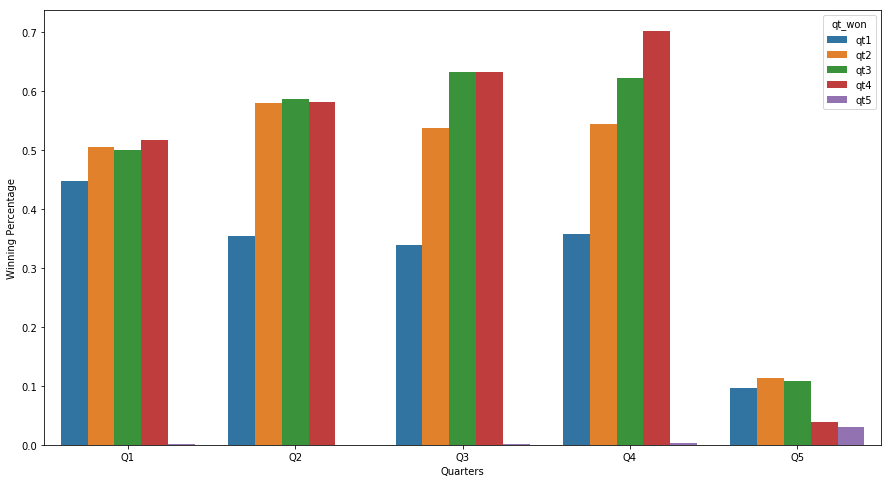

In [26]:
fig = plt.figure(figsize=(15,8))
ax = sns.barplot(x="qtr", y="Win", hue="qt_won", data=qt_win_df);
ax.set(xlabel='Quarters', ylabel = 'Winning Percentage')
plt.show()

The bar above below is particularly interesting. As a vislualization this gives us a glimps into whether winning a specific quarter matterns in the long run, in which we can observe a couple of key trends. To interprete this chart its best to walkthrough an example, lets take the first quarter winners. The Q1 Blue bar represents all teams who won the first quarter (69.7%). Each subsequent blue bar inicates when a team wins the first quarter about 52% win the second quarter, 51% win the thrid quarter, 55% win the fourth and if the game goes to overtime 16% win in overtime. 
1. 

#### Quarter Score differential (spread)

Next we look at the spread by quarter. We can see a major difference in spread for teams... this could be a sign of momentem as well. This indicated, teams that win early, typically stay ahead. 

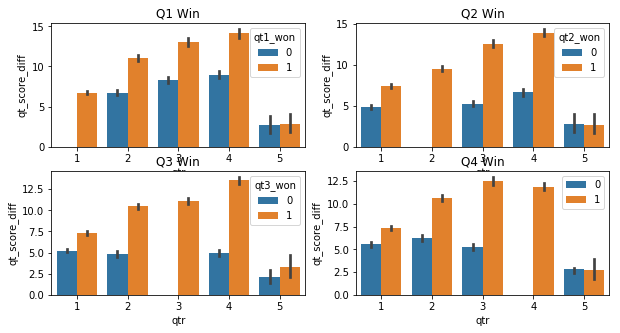

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax = sns.barplot(x="qtr", y="qt_score_diff", hue="qt1_won", data=nfl[(nfl.qt_wlt==1)], ax=axes[0][0]);
ax.set_title('Q1 Win')
ax = sns.barplot(x="qtr", y="qt_score_diff", hue="qt2_won", data=nfl[nfl.qt_wlt==1], ax=axes[0][1]);
ax.set_title('Q2 Win')
ax = sns.barplot(x="qtr", y="qt_score_diff", hue="qt3_won", data=nfl[nfl.qt_wlt==1], ax=axes[1][0]);
ax.set_title('Q3 Win')
ax = sns.barplot(x="qtr", y="qt_score_diff", hue="qt4_won", data=nfl[nfl.qt_wlt==1], ax=axes[1][1]);
ax.set_title('Q4 Win')
ax.legend()

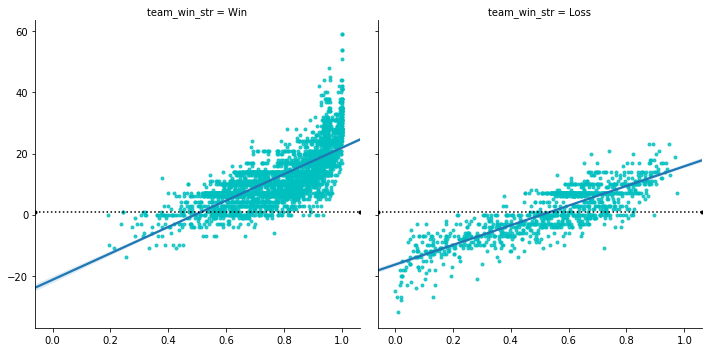

In [28]:
g = sns.lmplot('Win_Prob', 'qt_score_diff', col='team_win_str', data=nfl[(nfl.ScoreDiff1 >= 6)],
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=1, color="k", ls=":");

In [29]:
df3 = nfl[(nfl.ScoreDiff1 >= 7)].groupby(['posteam'])['team_win','qt_score_diff','qt_wlt','Total_Yards','FirstDown'].mean().reset_index().rename(columns={'team_win':'Win Percentage',
                                                                                                                                        'qt_wlt':'Qt Win Perc'})
df3[['Win Percentage','Qt Win Perc','Total_Yards','qt_score_diff','FirstDown']] = df3[['Win Percentage','Qt Win Perc','Total_Yards','qt_score_diff','FirstDown']].round(3)
df3 = df3.sort_values(by=['Win Percentage'], ascending=False)
print(df3.head(5), '\n',df3.tail(5))

   posteam  Win Percentage  qt_score_diff  Qt Win Perc  Total_Yards  FirstDown
21      NE           0.889         14.384        0.979      122.305      6.463
23     NYG           0.880         14.150        0.918      119.330      5.800
29     SEA           0.871         11.645        0.926      111.387      5.726
27     PIT           0.868         10.818        0.930      116.736      5.678
13     IND           0.860          9.983        0.941      109.364      5.975 
    posteam  Win Percentage  qt_score_diff  Qt Win Perc  Total_Yards  FirstDown
32      TB           0.579          6.487        0.753      101.158      5.553
10     DET           0.500          4.085        0.706      112.654      6.292
18     LAC           0.500          8.000        0.625      128.875      5.625
17      LA           0.500          7.500        0.857       95.938      5.562
7      CLE           0.391          4.663        0.759      109.565      5.467


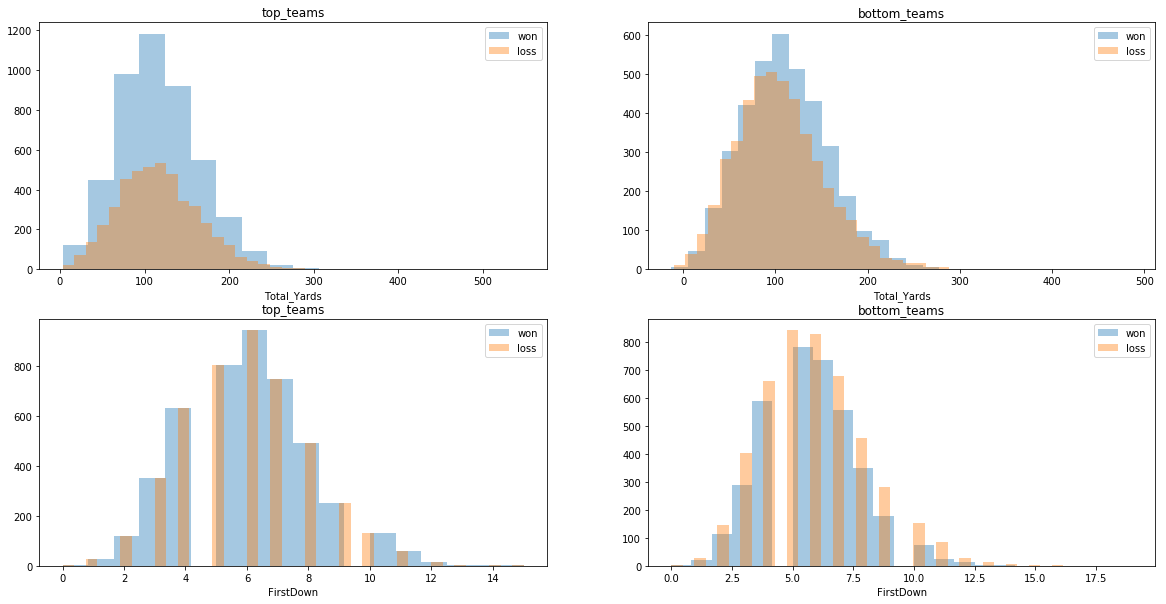

In [30]:
won = 'won'
loss = 'loss'
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20, 10))
top_teams = nfl[nfl.posteam.isin(df3.posteam[:16])]
bottom_teams = nfl[nfl.posteam.isin(df3.posteam[16:])]
ax = sns.distplot(top_teams[top_teams.qt_wlt==1].Total_Yards.dropna(), bins=18, label = won, ax = axes[0][0], kde =False)
ax = sns.distplot(top_teams[top_teams.qt_wlt==1].Total_Yards.dropna(), bins=40, label = loss, ax = axes[0][0], kde =False)
ax.legend()
ax.set_title('top_teams')
ax = sns.distplot(bottom_teams[bottom_teams.qt_wlt==1].Total_Yards.dropna(), bins=18, label = won, ax = axes[0][1], kde = False)
ax = sns.distplot(bottom_teams[bottom_teams.qt_wlt==0].Total_Yards.dropna(), bins=40, label = loss, ax = axes[0][1], kde = False)
ax.legend()
_ = ax.set_title('bottom_teams')
ax = sns.distplot(top_teams[top_teams.qt_wlt==1].FirstDown.dropna(), bins=18, label = won, ax = axes[1][0], kde =False)
ax = sns.distplot(top_teams[top_teams.qt_wlt==1].FirstDown.dropna(), bins=40, label = loss, ax = axes[1][0], kde =False)
ax.legend()
ax.set_title('top_teams')
ax = sns.distplot(bottom_teams[bottom_teams.qt_wlt==1].FirstDown.dropna(), bins=18, label = won, ax = axes[1][1], kde = False)
ax = sns.distplot(bottom_teams[bottom_teams.qt_wlt==0].FirstDown.dropna(), bins=40, label = loss, ax = axes[1][1], kde = False)
ax.legend()
_ = ax.set_title('bottom_teams')

#### Perason's R Correlation Coefficient

__Correlation coefficients__ ranges from -1 to 1. When the value is cloase to 1, it means that there is a strong positive correlation. For example, below we subset the correlation matrix that we created above and sorted the values. We can observe the team winning percentage tends to go up when there is a higher score difference in the fourth quarter. When the coefficient is close to -1, it means that there is a strong negative correlation: you can see a negative correlation between the team wins and turnovers

To understand if early quarter wins correlate with games won, or if total first downs obtained or third down efficiencies in the first half play a strong role on winning the quarter or the game, we will need to measure the relationship between these variable. That is where Pearson's Correlation Coefficient comes in to play. Here a primer on how it works. By definition a correlation is a measure of dependency between multiple values. Using Pearson's Correlation Coefficient we will provide a list of variable and will test our hypothesis on whether there is a direct relationship between lets say winning the first and second quarter and winning the game. Pearson's will provide a number back ranging between `-1` and `+1`.

In [ ]:
# 'ScoreDiff4','ScoreDiff3','ScoreDiff5','qt4_won',
potentialFeatures = ['qt_score_diff','qt_wlt','ScoreDiff1','ScoreDiff2', 'qt1_won','qt3_won',  'home_away',
                     'Touchdown','Turnover','Penalty_Yards','Win_Prob','team_win','third_down_conv_rate','fourth_down_conv_rate','Total_Yards',
                    'FirstDown','EPA', 'qt2_won']
nfl_corr = nfl[potentialFeatures].corr()
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(nfl_corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
nfl_corr

In [ ]:
nfl_corr['team_win'].sort_values(ascending=False)

In [153]:
# create a list containing Pearson's correlation between 'team_win' with each column in cols
correlations = [nfl['team_win'].corr(nfl[f]) for f in potentialFeatures]
len(potentialFeatures), len(correlations)

(17, 17)

We make sure that the number of selected features and the correlations calculated are the same (e.g., 10 in this case).

Next couple of cells show some lines of code that use pandas plotting functions to create a 2D graph of these correlation values and column names

In [154]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df, y_label):
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20,12)
    plt.ylabel(y_label)
    
    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

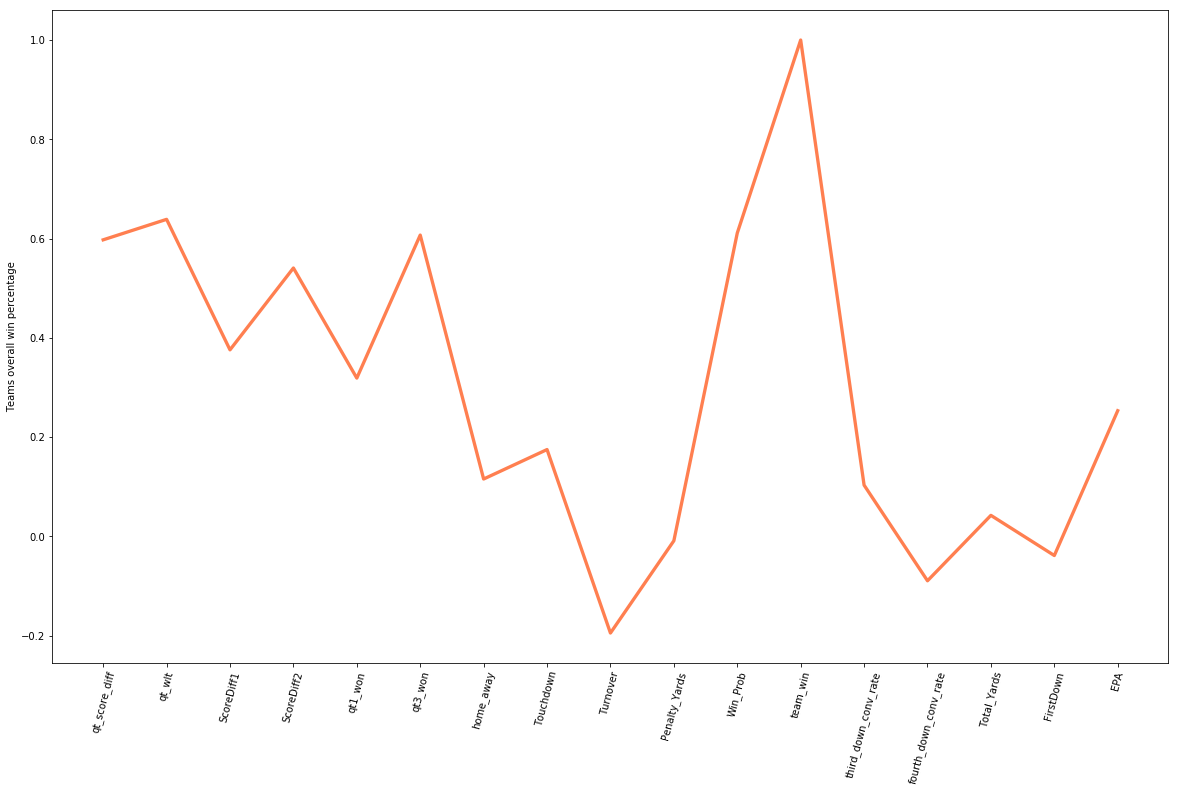

,attributes,correlation
0,qt_score_diff,0.597373
1,qt_wlt,0.638670
2,ScoreDiff1,0.375696
3,ScoreDiff2,0.540613
4,qt1_won,0.318753
5,qt3_won,0.606959
6,home_away,0.115420
7,Touchdown,0.174788
8,Turnover,-0.194940
9,Penalty_Yards,-0.009016


In [155]:
# create a dataframe suing cols and correlations

df5 = pd.DataFrame({'attributes': potentialFeatures, 'correlation': correlations})

# lets plot above dataframe using the function we created

plot_dataframe(df5, 'Teams overall win percentage')
df5

## Model Evaluation, Hyperparameter Tuning and Result Evaluation
create feature df and drio unnecessary fatures. 

In [156]:
# y includes our labels (wins and losses) and x includes our features
y = nfl.team_win_str
X = nfl[potentialFeatures].drop('team_win', axis=1)

# change NAN to 0
where_are_NaNs = np.isnan(X)
X[where_are_NaNs] = 0

use the package sklearn and its associated preprocessing utilities to normalize the data.

In [157]:
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

Accuracy on training set: 0.987
Accuracy on test set: 0.805


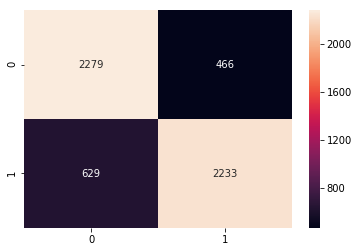

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print("Accuracy on training set: {:.3f}".format(accuracy_score(y_train,clf_rf.predict(X_train))))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test,clf_rf.predict(X_test))))
#print('Accuracy is: ',ac)

cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is 94.6% and it can be seen in the concusion matrix that we have made some wrong predictions. Now lets see other feature selection methods to find better results

### Univariate feature selection and random forest classificatio

In univariate feature selection, we will use [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) that removes all but the k highest scoring features. In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.

In [159]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [9.16852197e+01 2.39498656e+03 5.58495461e+01 1.10899149e+02
 7.86633961e+02 2.55195509e+03 8.35130949e+01 5.86788859e+01
 8.35485561e+01 1.82585555e-01 6.75590655e+02 2.49029671e+01
 1.04191893e+02 1.06160093e+00 8.70728480e-01 2.82934728e+00]
Feature list: RangeIndex(start=0, stop=16, step=1)


Accuracy on training set: 0.976
Accuracy on test set: 0.765


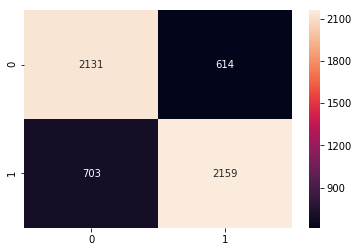

In [160]:
x_train_2 = select_feature.transform(X_train)
x_test_2 = select_feature.transform(X_test)


#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))

#print('Accuracy is: ',ac_2)

print("Accuracy on training set: {:.3f}".format(accuracy_score(y_train,clf_rf_2.predict(x_train_2))))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test,clf_rf_2.predict(x_test_2))))

cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

### Support Vector Machine

In [161]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(accuracy_score(y_train, svc.predict(X_train))))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test, svc.predict(X_test))))

Accuracy on training set: 0.802
Accuracy on test set: 0.805


looks like random forest had a higher accuracy

In [162]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.805


#### Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

print("Accuracy on training set: {:.3f}".format(accuracy_score(y_train,logreg.predict(X_train))))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test,logreg.predict(X_test))))

Accuracy on training set: 0.812
Accuracy on test set: 0.816


### Precision and recall

Percision and Recall scores for random forest 2

In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf_rf.predict(X_test)))

             precision    recall  f1-score   support

       Loss       0.78      0.83      0.81      2745
        Win       0.83      0.78      0.80      2862

avg / total       0.81      0.80      0.80      5607



In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf_rf_2.predict(x_test_2)))

             precision    recall  f1-score   support

       Loss       0.75      0.78      0.76      2745
        Win       0.78      0.75      0.77      2862

avg / total       0.77      0.77      0.77      5607



In [166]:
feature_labels = np.array(potentialFeatures)
importance = clr_rf_2.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

ScoreDiff1-1.26%
ScoreDiff2-11.33%
qt_score_diff-12.56%
qt_wlt-16.90%
qt1_won-57.95%


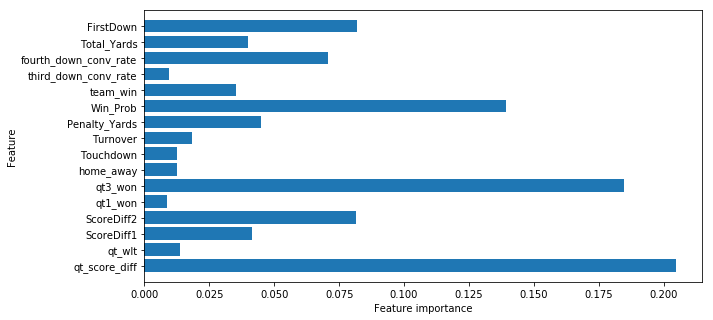

In [171]:
def plot_feature_importances(model):
    plt.figure(figsize=(10,5))
    n_features = len(model.feature_importances_)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_labels)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(clf_rf)

## Summary
This post is not intended to conclude that winning in the first quarter is not important, but there is a very strong correlation between winning quarter and winning games over the course of the season.

A feature that I didnt have time to develop with a method to identify time of possession for each quarter, since First Down was a strong indicator, the team that has the ball the majority of the time would seem to pose such a correlation as well. 

In [222]:
# 'ScoreDiff5','ScoreDiff2','Win_Prob','ScoreDiff4','qt4_won',,,

,'ScoreDiff1','qt1_won','qt2_won','ScoreDiff2','qt3_won','ScoreDiff3',

# Model Performance By QT

In [69]:
potentialFeatures = ['qt_score_diff','qt_wlt','home_away','ScoreDiff3','qt3_won',
                     'Touchdown','Turnover','Penalty_Yards','team_win','third_down_conv_rate','fourth_down_conv_rate','Total_Yards',
                    'FirstDown','EPA']

Accuracy on training set: 0.983
Accuracy on test set: 0.772
             precision    recall  f1-score   support

       Loss       0.75      0.81      0.78       675
        Win       0.80      0.74      0.77       708

avg / total       0.77      0.77      0.77      1383



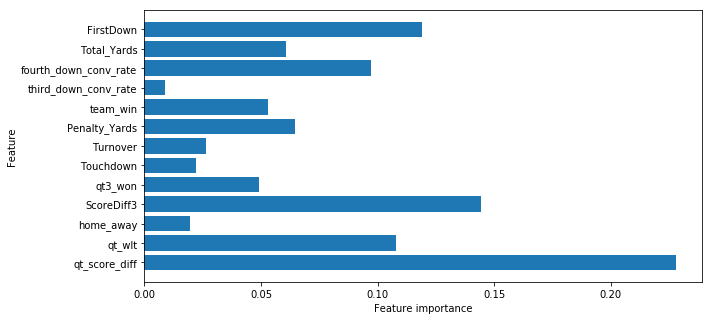

In [70]:
# y includes our labels (wins and losses) and x includes our features
y = nfl[nfl.qtr ==3].team_win_str
X = nfl[nfl.qtr ==3][potentialFeatures].drop('team_win', axis=1)

# change NAN to 0
where_are_NaNs = np.isnan(X)
X[where_are_NaNs] = 0

from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print("Accuracy on training set: {:.3f}".format(accuracy_score(y_train,clf_rf.predict(X_train))))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test,clf_rf.predict(X_test))))
#print('Accuracy is: ',ac)

#cm = confusion_matrix(y_test,clf_rf.predict(X_test))
#sns.heatmap(cm,annot=True,fmt="d")

# select feature
feature_labels = np.array(potentialFeatures)
importance = clf_rf.feature_importances_
feature_indexes_by_importance = importance.argsort()

from sklearn.metrics import classification_report
print(classification_report(y_test,clf_rf.predict(X_test)))

def plot_feature_importances(model):
    plt.figure(figsize=(10,5))
    n_features = len(model.feature_importances_)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_labels)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(clf_rf)